# 기본 세팅

In [1]:
%cd C:\\Users\\User\\Desktop\\boot camp

C:\Users\User\Desktop\boot camp


In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')


In [3]:
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
 print(mpl.font_manager.FontProperties(fname=font).get_name())
 mpl.font_manager.fontManager.addfont(font)

Noto Sans KR
Noto Sans KR
NanumSquare Neo OTF Light
NanumSquareOTF_ac
NanumGothic Eco
Nanum Brush Script OTF
NanumBarunGothicOTF
NanumMyeongjoOTF Eco
NanumSquareOTF
NanumGothic
NanumSquare_ac
NanumBarunGothicOTF
NanumGothic
NanumBarunpen
Nanum Brush Script
NanumSquareOTF
NanumGothic Eco
NanumSquareRoundOTF
Noto Sans KR
NanumBarunGothicOTF
NanumSquareOTF_ac
NanumSquareRoundOTF
NanumGothic
NanumSquare Neo Regular
NanumMyeongjo Eco
NanumSquare Neo OTF Regular
Noto Sans KR
NanumSquare
NanumMyeongjo
NanumSquareRoundOTF
NanumMyeongjoOTF Eco
NanumGothicOTF Eco
NanumBarunGothic
NanumSquareRound
NanumSquare
Noto Sans KR
NanumSquare Neo OTF Bold
NanumSquareRound
NanumMyeongjo
NanumGothicOTF
NanumSquareRound
NanumSquare Neo ExtraBold
NanumSquare_ac
NanumSquareRoundOTF
NanumMyeongjo
NanumBarunpenOTF
NanumMyeongjoOTF
NanumMyeongjoOTF
NanumMyeongjoOTF Eco
NanumBarunGothicOTF
NanumGothicOTF Eco
NanumSquare Neo Bold
NanumSquareOTF_ac
NanumMyeongjo Eco
NanumMyeongjoOTF YetHangul
NanumBarunGothic
NanumS

In [4]:
# 시스템 폰트 경로 리스트
font_list = mpl.font_manager.findSystemFonts()
print(font_list)
# 폰트 설정하기
prop = mpl.font_manager.FontProperties(fname='원하는 폰트 경로')
plt.rcParams['font.family'] = prop.get_family()

['C:\\Windows\\Fonts\\YuGothM.ttc', 'C:\\Windows\\Fonts\\REFSPCL.TTF', 'C:\\Windows\\Fonts\\constan.ttf', 'C:\\Windows\\Fonts\\YuGothB.ttc', 'C:\\Windows\\Fonts\\arialbi.ttf', 'C:\\Windows\\Fonts\\msyhl.ttc', 'C:\\Windows\\Fonts\\calibrili.ttf', 'C:\\Users\\User\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Cafe24Ohsquare.ttf', 'C:\\Windows\\Fonts\\arialbd.ttf', 'C:\\Windows\\Fonts\\georgiai.ttf', 'C:\\Windows\\Fonts\\CENTURY.TTF', 'C:\\Windows\\Fonts\\cambria.ttc', 'C:\\Windows\\Fonts\\Nirmala.ttf', 'C:\\Windows\\Fonts\\ntailu.ttf', 'C:\\Windows\\Fonts\\ntailub.ttf', 'C:\\Windows\\Fonts\\segoeui.ttf', 'C:\\Windows\\Fonts\\HanSantteutDotum-Bold.ttf', 'C:\\Windows\\Fonts\\H2MJSM.TTF', 'C:\\Windows\\Fonts\\gulim.ttc', 'C:\\Windows\\Fonts\\calibril.ttf', 'C:\\Windows\\Fonts\\msyi.ttf', 'C:\\Windows\\Fonts\\phagspab.ttf', 'C:\\Windows\\Fonts\\trebuc.ttf', 'C:\\Windows\\Fonts\\NirmalaB.ttf', 'C:\\Windows\\Fonts\\GARAIT.TTF', 'C:\\Windows\\Fonts\\corbeli.ttf', 'C:\\Windows\\Fonts\\palai.ttf', 

In [5]:
# Set font family globally
mpl.rcParams['font.family'] = 'Noto Sans KR'
print(mpl.rcParams['font.family'])

['Noto Sans KR']


## 데이터 로드

In [6]:
import easydict
args = easydict.EasyDict() #dict values 에 .으로 접근 가능하다 

# path 정보
args.default_path = 'C:\\Users\\User\\Desktop\\' # 파일 위치 
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'submission0407.csv' # 새로운 파일 
args.save_results = args.default_path+"model_results.csv" # 정보저장 파일 

# 데이터 분석을 위한 변수들
args.random_state = 42
args.results = []

In [7]:
ori_result = pd.read_csv(args.save_results)
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)
ori_train.shape, ori_test.shape

((916, 12), (393, 11))

# 데이터 분리

In [8]:
ori_tr = ori_train.copy()
ori_te = ori_test.copy()

ori_tr.shape, ori_te.shape

((916, 12), (393, 11))

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train, test = train_test_split(ori_train, test_size=0.3, stratify=ori_train['survived'], random_state=args.random_state)

train.shape, test.shape

((641, 12), (275, 12))

# 전처리

In [11]:
train.drop(['ticket','cabin'], axis=1, inplace=True)
test.drop(['ticket','cabin'], axis=1, inplace=True)

In [12]:
ori_te.drop(['ticket','cabin'],axis=1,inplace=True)

In [13]:
train.drop(['passengerid'], axis=1, inplace=True)
test.drop(['passengerid'], axis=1, inplace=True)
ori_te.drop(['passengerid'],axis=1,inplace=True)

In [14]:
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)
ori_te.reset_index(drop=True,inplace=True)

In [15]:
age_median = train['age'].median()
fare_median = train['fare'].median()
embarked_mode = train['embarked'].mode().values[0]

age_median, fare_median, embarked_mode

(28.0, 14.5, 'S')

In [16]:
age_median = train['age'].median()
fare_median = train['fare'].median()
embarked_mode = train['embarked'].mode().values[0]

# train['age'].fillna(train.groupby(['pclass',initial_name'])['age'].transform('mean'), inplace=True)

train['fare'].fillna(fare_median, inplace=True)
test['fare'].fillna(fare_median, inplace=True)
ori_te['fare'].fillna(fare_median, inplace=True)

test['embarked'].fillna(embarked_mode, inplace=True)
ori_te['embarked'].fillna(embarked_mode, inplace=True)

train.isnull().sum().sum(), test.isnull().sum().sum(), ori_te.isnull().sum().sum()

(0, 0, 0)

In [ ]:
train

# EDA

## age

In [17]:
def social(age):
    if (age >=20) & (age<=39):
      result = '사회초년생'
    else :
      result = 'ohters'  
    return result

train['social'] = train['age'].map(lambda x: social(x))
test['social'] = test['age'].map(lambda x: social(x))
ori_te['social'] = ori_te['age'].map(lambda x: social(x))

In [18]:
def add_new_age(age):
    if age <= 16   :
      result = '어린이'
    elif (age>16) & (age <=32):
      result = '젋은이'
    elif (age>32) & (age <=48):
      result = '정상나이'
    elif (age>48) & (age <=64):
      result = '중년'
    elif age>64 :
      result = '노년'
    return result

train['new_age'] = train['age'].map(lambda x: add_new_age(x))
test['new_age'] = test['age'].map(lambda x: add_new_age(x))
ori_te['new_age'] = ori_te['age'].map(lambda x: add_new_age(x))
train.head()

,survived,pclass,name,gender,age,sibsp,parch,fare,embarked,social,new_age
0,0,1,"Klaber, Mr. Herman",male,28.0,0,0,26.5500,S,사회초년생,젋은이
1,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,135.6333,C,사회초년생,정상나이
2,0,3,"Davies, Mr. Evan",male,22.0,0,0,8.0500,S,사회초년생,젋은이
3,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,8.6625,S,사회초년생,젋은이
4,0,3,"Linehan, Mr. Michael",male,28.0,0,0,7.8792,Q,사회초년생,젋은이


In [19]:
# def add_new_age(age):
#     if age <= 5   :
#       result = '유아'
#     elif (age>5) & (age <=12):
#       result = '어린이'
#     elif (age>12) & (age <=18):
#       result = '청소년'
#     elif (age>18) & (age <=39):
#       result = '성인'
#     elif (age>39) & (age <=49):
#       result = '중년'
#     elif (age>49) & (age <=64):
#       result = '장년'
#     else :
#       result = '노인'
#     return result

# train['new_age'] = train['age'].map(lambda x: add_new_age(x))
# test['new_age'] = test['age'].map(lambda x: add_new_age(x))
# ori_te['new_age'] = ori_te['age'].map(lambda x: add_new_age(x))
# train.head()

In [20]:
# train['gender_new_age'] = train.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)
# test['gender_new_age'] = test.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)
# ori_te['gender_new_age'] = ori_te.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)

# print(f"{train['gender_new_age'].nunique()} / \n {train['gender_new_age'].unique()} \n")

In [21]:
# train['gender_new_age'] = train.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)
# test['gender_new_age'] = test.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)
# ori_te['gender_new_age'] = ori_te.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)

# print(f"{train['gender_new_age'].nunique()} / \n {train['gender_new_age'].unique()} \n")

In [22]:
# train['pclass * age'] = train['pclass'] * train['age']
# test['pclass * age'] = test['pclass'] * test['age']
# ori_te['pclass * age'] = ori_te['pclass'] * ori_te['age']

In [23]:
# def female_new_age(gender_new_age):
#     if gender_new_age == 'female_성인':
#       result = 1
#     else:
#       result = 0
#     return result


# train['female_new_age'] = train['gender_new_age'].map(lambda x: female_new_age(x))
# test['female_new_age'] = test['gender_new_age'].map(lambda x: female_new_age(x))
# ori_te['new_afemale_new_agege'] = ori_te['gender_new_age'].map(lambda x: female_new_age(x))
# train.head()

In [24]:
# fig = sns.displot(train, x="female_new_age", hue="survived", multiple="dodge")
# fig.fig.set_size_inches(30,10)

In [25]:
# train.drop(['gender_new_age','new_age'], axis=1, inplace=True)
# test.drop(['gender_new_age','new_age'], axis=1, inplace=True)
# ori_te.drop(['gender_new_age','new_age'],axis=1,inplace=True)

In [26]:
train.shape , test.shape , ori_te.shape

((641, 11), (275, 11), (393, 10))

In [27]:
def add_infant(age):
  result = 'not infant'
  try:
    if age <= 5:
      result = 'infant'
  except:
    pass
  return result

train['infant'] = train['age'].map(lambda x: add_infant(x))
test['infant'] = test['age'].map(lambda x: add_infant(x))
ori_te['infant'] = ori_te['age'].map(lambda x: add_infant(x))

print(f"{train['infant'].nunique()} / \n {train['infant'].unique()} \n")
train.shape, test.shape, ori_te.shape

2 / 
 ['not infant' 'infant'] 



((641, 12), (275, 12), (393, 11))

In [28]:
train['gender_infant'] = train.apply(lambda row: row['gender']+'_'+str(row['infant']), axis=1)
test['gender_infant'] = test.apply(lambda row: row['gender']+'_'+str(row['infant']), axis=1)
ori_te['gender_infant'] = ori_te.apply(lambda row: row['gender']+'_'+str(row['infant']), axis=1)
# 성별과 5살 미만인지 유무에 따라 새로운 feature를 만듬 

print(f"{train['gender_infant'].nunique()} / \n {train['gender_infant'].unique()} \n")
train.shape, test.shape, ori_te.shape

4 / 
 ['male_not infant' 'female_not infant' 'female_infant' 'male_infant'] 



((641, 13), (275, 13), (393, 12))

In [29]:
def female_gender_infant(gender_infant):
    if gender_infant == 'female_infant':
      result = 1
    else:
      result = 0
    return result


train['female_gender_infant'] = train['gender_infant'].map(lambda x: female_gender_infant(x))
test['female_gender_infant'] = test['gender_infant'].map(lambda x: female_gender_infant(x))
ori_te['female_gender_infant'] = ori_te['gender_infant'].map(lambda x: female_gender_infant(x))
train.head()

,survived,pclass,name,gender,age,sibsp,parch,fare,embarked,social,new_age,infant,gender_infant,female_gender_infant
0,0,1,"Klaber, Mr. Herman",male,28.0,0,0,26.5500,S,사회초년생,젋은이,not infant,male_not infant,0
1,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,135.6333,C,사회초년생,정상나이,not infant,female_not infant,0
2,0,3,"Davies, Mr. Evan",male,22.0,0,0,8.0500,S,사회초년생,젋은이,not infant,male_not infant,0
3,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,8.6625,S,사회초년생,젋은이,not infant,male_not infant,0
4,0,3,"Linehan, Mr. Michael",male,28.0,0,0,7.8792,Q,사회초년생,젋은이,not infant,male_not infant,0


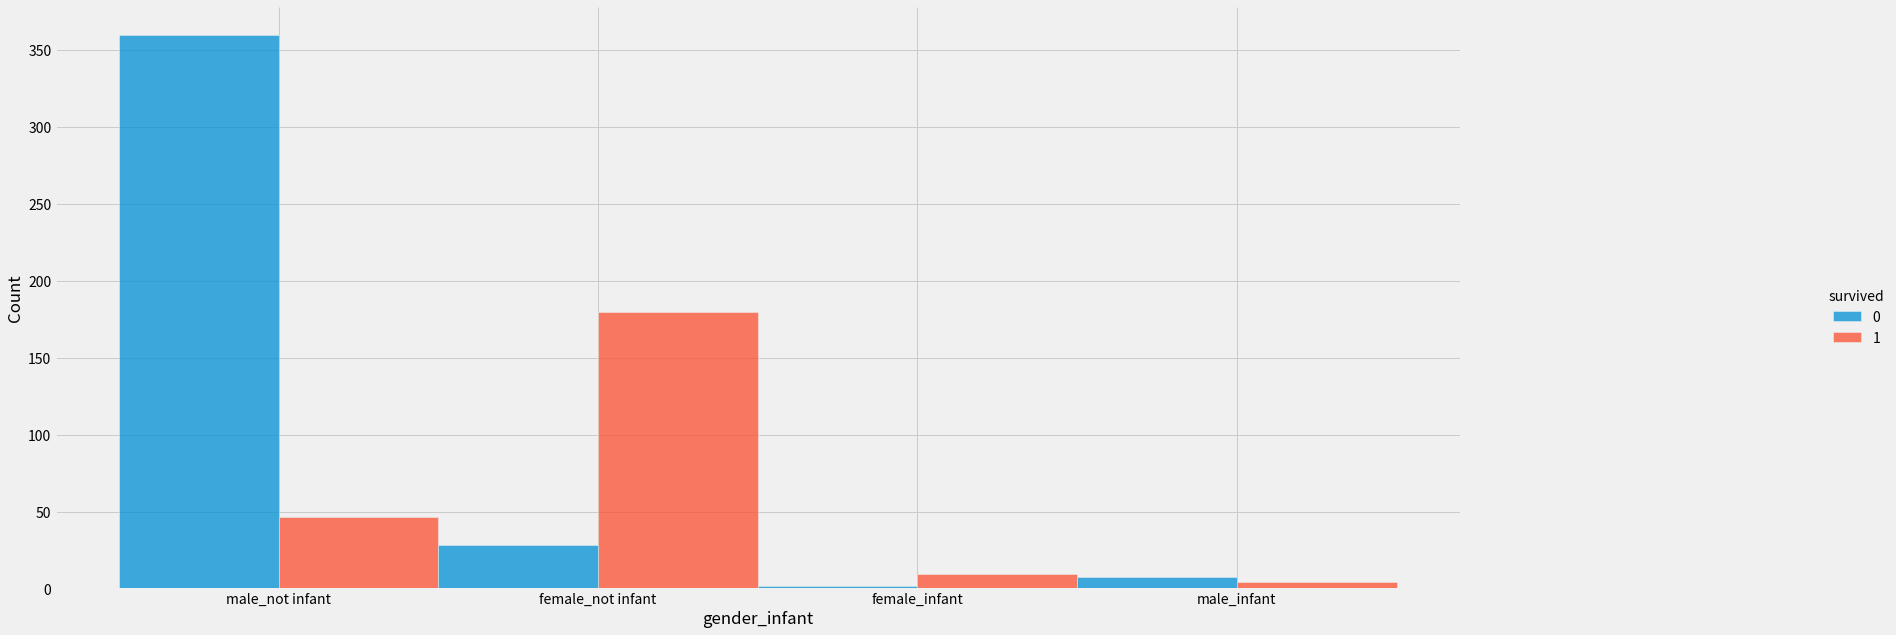

In [30]:
fig = sns.displot(train, x="gender_infant", hue="survived", multiple="dodge")
fig.fig.set_size_inches(30,10)

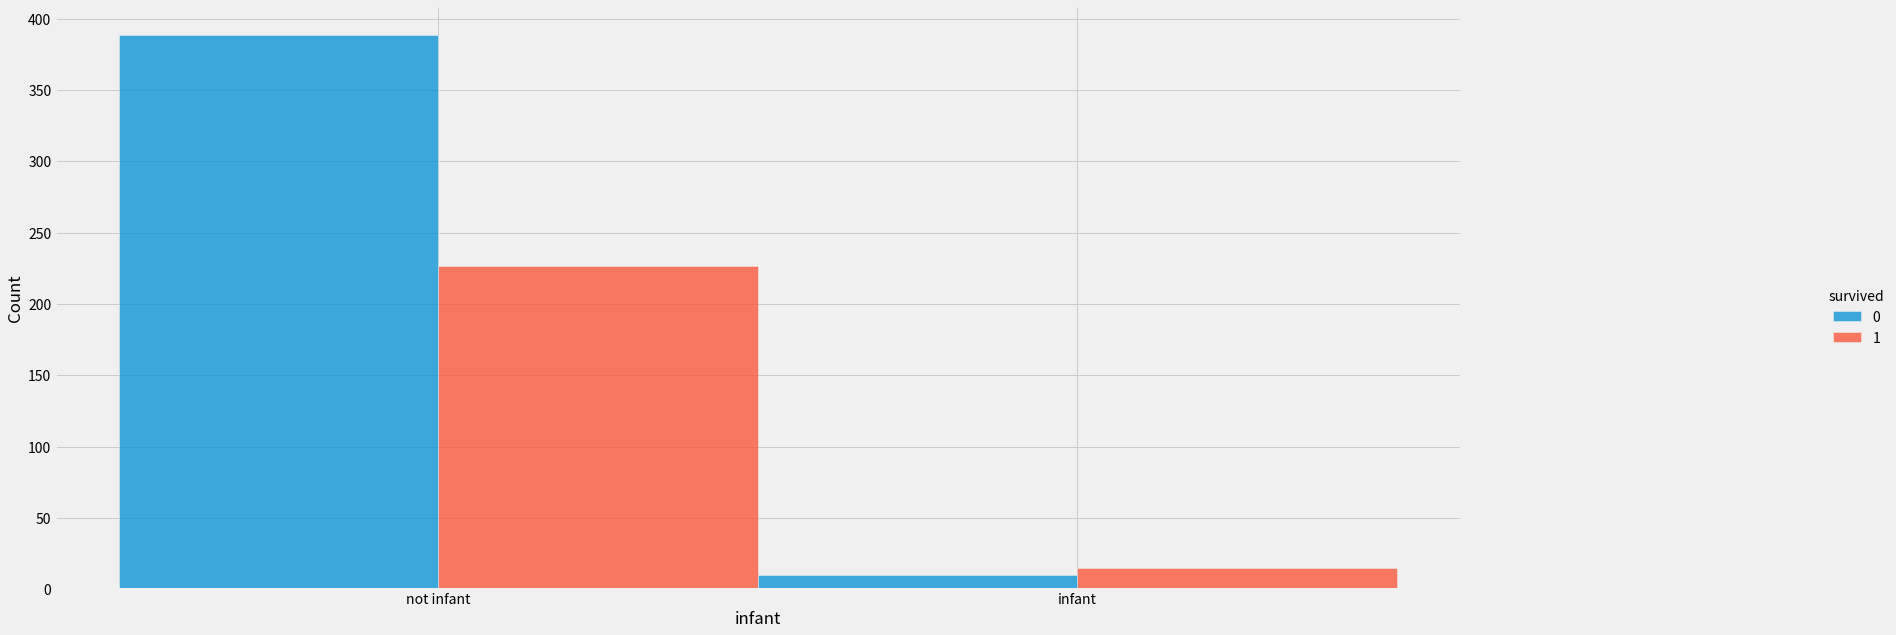

In [31]:
fig = sns.displot(train, x="infant", hue="survived", multiple="dodge")
fig.fig.set_size_inches(30,10)

## pclass

In [32]:
def add_pclass_1_level(pclass):
  result = 'high pclass(1)'
  try:
    if pclass == 3 or pclass == 2 :
      result = 'low pcalss(2,3)'
  except:
    pass
  return result

train['add_pclass_1_level'] = train['pclass'].map(lambda x: add_pclass_1_level(x))
test['add_pclass_1_level'] = test['pclass'].map(lambda x: add_pclass_1_level(x))
ori_te['add_pclass_1_level'] = ori_te['pclass'].map(lambda x: add_pclass_1_level(x))

In [33]:
train['pclass1_gender'] = train.apply(lambda row: row['gender']+'_'+row['add_pclass_1_level'], axis=1)
test['pclass1_gender'] = test.apply(lambda row: row['gender']+'_'+row['add_pclass_1_level'], axis=1)
ori_te['pclass1_gender'] = ori_te.apply(lambda row: row['gender']+'_'+row['add_pclass_1_level'], axis=1)

In [34]:
train['pclass1_gender'].value_counts()

male_low pcalss(2,3)      324
female_low pcalss(2,3)    156
male_high pclass(1)        96
female_high pclass(1)      65
Name: pclass1_gender, dtype: int64

In [35]:
def male_add_pclass_1(pclass1_gender):
  result = 0
  try:
    if pclass1_gender == 'male_low pcalss(2,3)':
      result = 1
  except:
    pass
  return result

train['male_add_pclass_1'] = train['pclass1_gender'].map(lambda x: male_add_pclass_1(x))
test['male_add_pclass_1'] = test['pclass1_gender'].map(lambda x: male_add_pclass_1(x))
ori_te['male_add_pclass_1'] = ori_te['pclass1_gender'].map(lambda x: male_add_pclass_1(x))

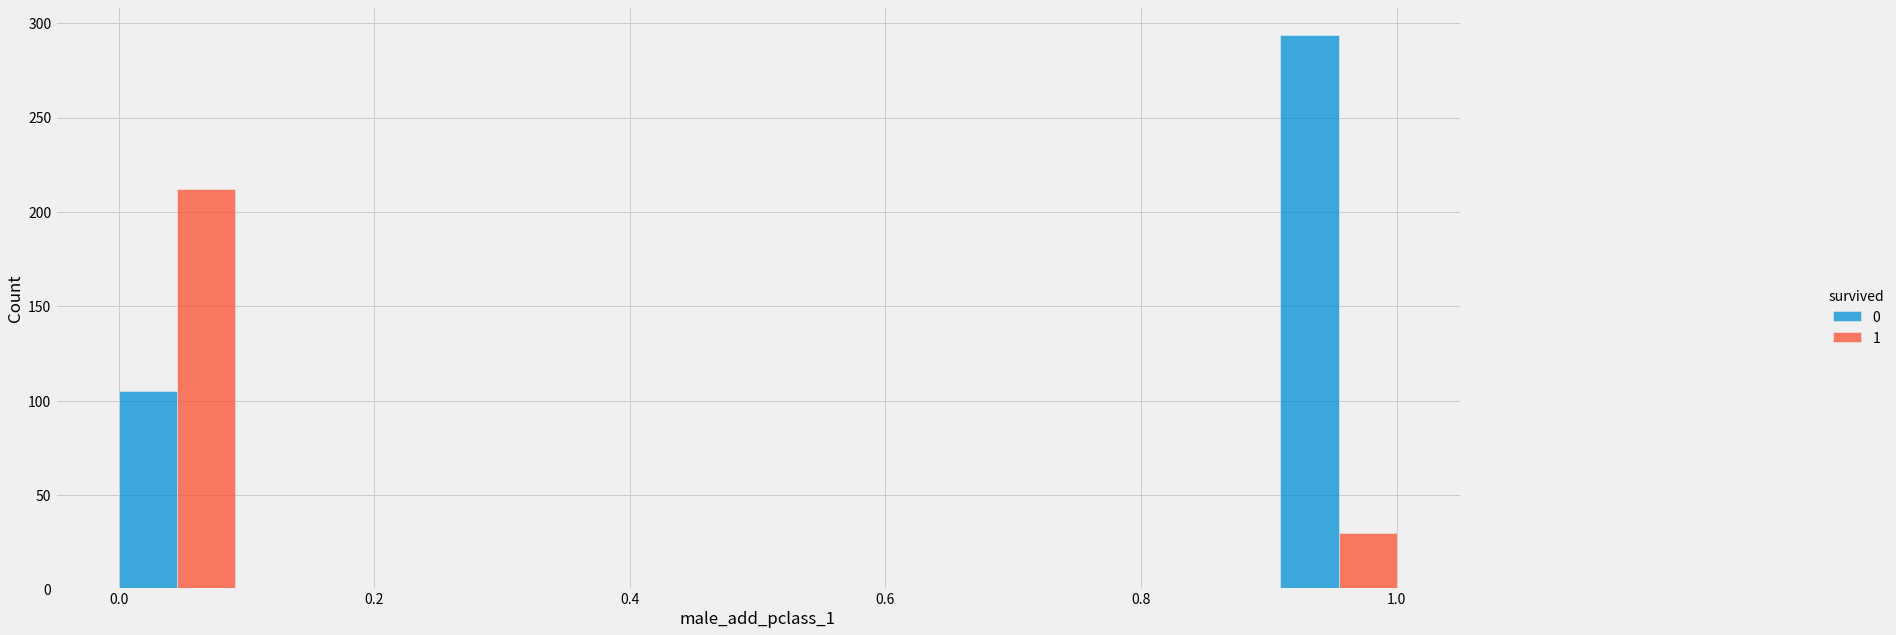

In [36]:
fig = sns.displot(train, x="male_add_pclass_1", hue="survived", multiple="dodge")
fig.fig.set_size_inches(30,10)

In [37]:
def pclass_3_level(pclass):
  result = 0
  try:
    if pclass == 1 or pclass == 2 :
      result = 1
  except:
    pass
  return result

train['pclass_3_level'] = train['pclass'].map(lambda x: pclass_3_level(x))
test['pclass_3_level'] = test['pclass'].map(lambda x: pclass_3_level(x))
ori_te['pclass_3_level'] = ori_te['pclass'].map(lambda x: pclass_3_level(x))

In [38]:
train['pclass3_infant'] = train.apply(lambda row: str(row['infant'])+'_'+str(row['pclass_3_level']), axis=1)
test['pclass3_infant'] = test.apply(lambda row: str(row['infant'])+'_'+str(row['pclass_3_level']), axis=1)
ori_te['pclass3_infant'] = ori_te.apply(lambda row: str(row['infant'])+'_'+str(row['pclass_3_level']), axis=1)

In [39]:
train['pclass3_infant'].value_counts()

not infant_0    314
not infant_1    302
infant_0         21
infant_1          4
Name: pclass3_infant, dtype: int64

In [40]:
def low_pclass_infant(pclass3_infant):
  result = 0
  try:
    if pclass3_infant == 'infant_low pcalss(1,2)':
      result = 1
  except:
    pass
  return result

train['low_pclass_infant'] = train['pclass3_infant'].map(lambda x: low_pclass_infant(x))
test['low_pclass_infant'] = test['pclass3_infant'].map(lambda x: low_pclass_infant(x))
ori_te['low_pclass_infant'] = ori_te['pclass3_infant'].map(lambda x: low_pclass_infant(x))

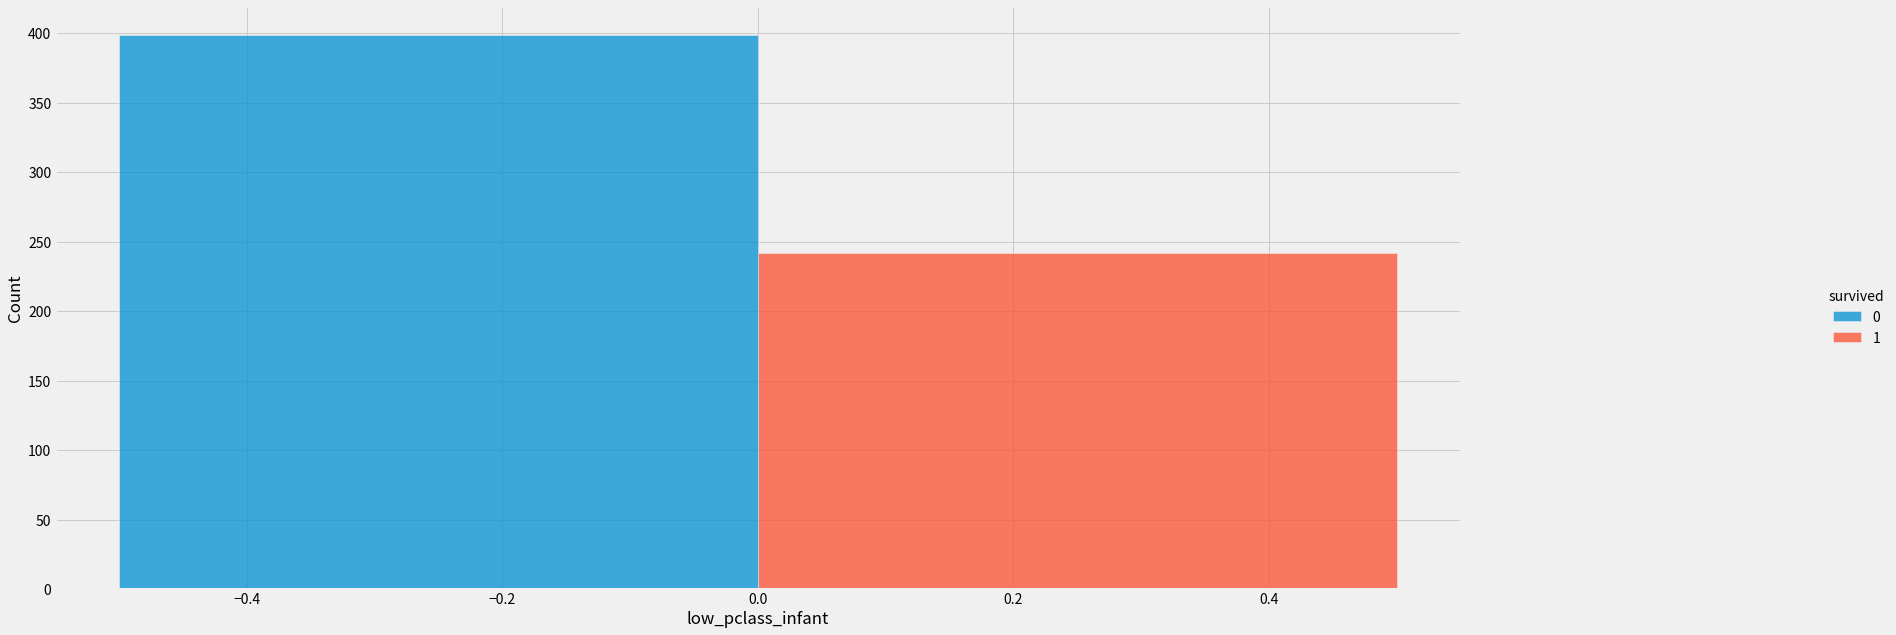

In [41]:
fig = sns.displot(train, x="low_pclass_infant", hue="survived", multiple="dodge")
fig.fig.set_size_inches(30,10)

In [42]:
train['pclass3_gender'] = train.apply(lambda row: row['gender']+'_'+str(row['pclass_3_level']), axis=1)
test['pclass3_gender'] = test.apply(lambda row: row['gender']+'_'+str(row['pclass_3_level']), axis=1)
ori_te['pclass3_gender'] = ori_te.apply(lambda row: row['gender']+'_'+str(row['pclass_3_level']), axis=1)

In [43]:
train['pclass3_gender'].value_counts()

male_0      234
male_1      186
female_1    120
female_0    101
Name: pclass3_gender, dtype: int64

In [44]:
def low_pclass_gender(pclass3_gender):
    if pclass3_gender == 'male_low pcalss(1,2)':
      result = 1
    elif pclass3_gender == 'female_low pcalss(1,2)':
      result = 2
    else :
      result = 3
    return result

train['low_pclass_gender'] = train['pclass3_gender'].map(lambda x: low_pclass_gender(x))
test['low_pclass_gender'] = test['pclass3_gender'].map(lambda x: low_pclass_gender(x))
ori_te['low_pclass_gender'] = ori_te['pclass3_gender'].map(lambda x: low_pclass_gender(x))

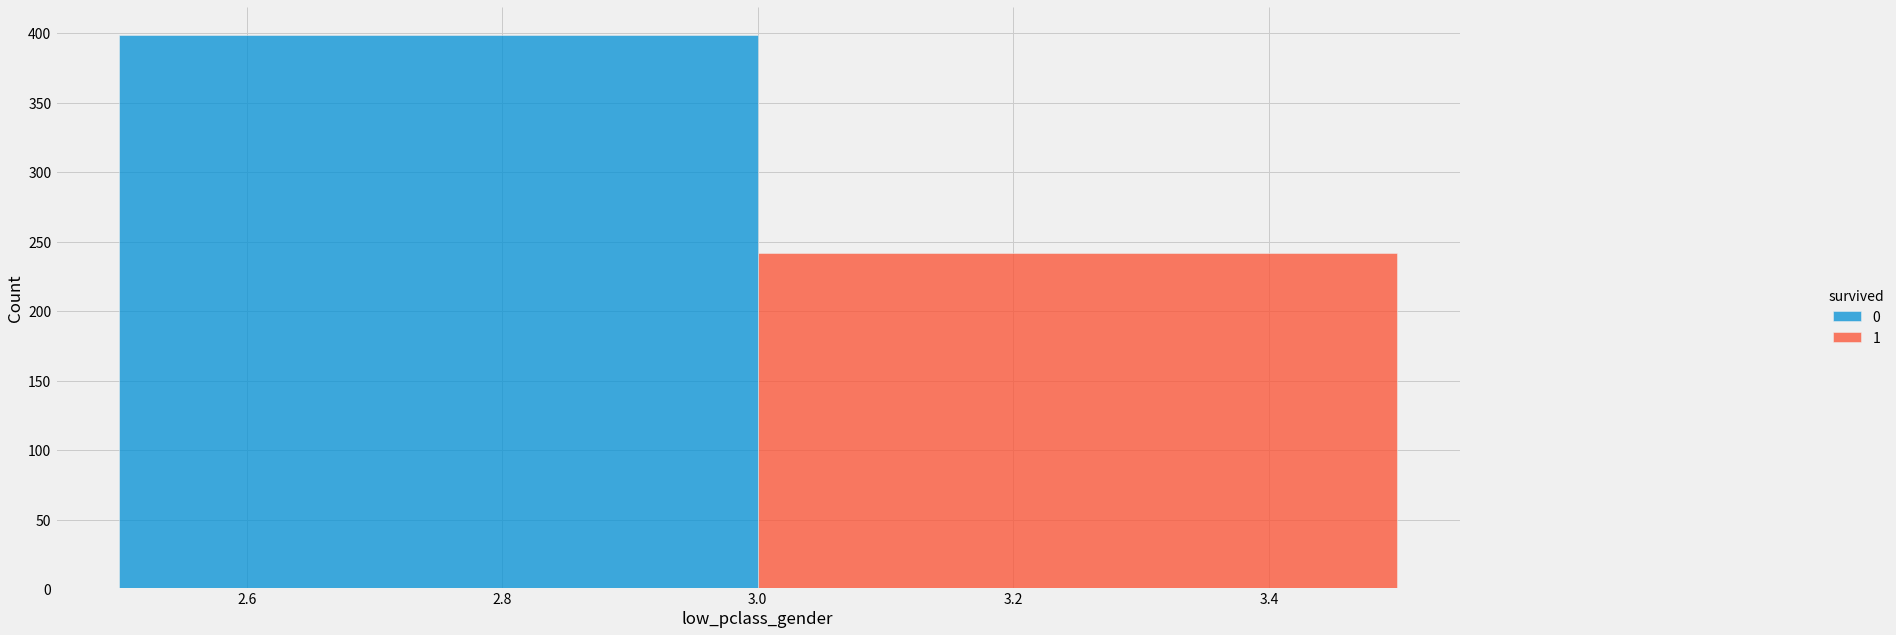

In [45]:
fig = sns.displot(train, x="low_pclass_gender", hue="survived", multiple="dodge")
fig.fig.set_size_inches(30,10)

## fare

In [46]:
# def fare_leval(fare):
#     if fare <= 51   :
#       result = 'low fare'
#     else :
#       result = 'high fare'
#     return result

# train['fare_leval'] = train['fare'].map(lambda x: fare_leval(x))
# test['fare_leval'] = test['fare'].map(lambda x: fare_leval(x))
# ori_te['fare_leval'] = ori_te['fare'].map(lambda x: fare_leval(x))


In [47]:
def fare_leval2(fare):
    if fare <= 7.91   :
      result = 0
    elif (fare >7.91) or (fare <=14.454):
      result = 1
    elif (fare >14.454) or (fare <=31):
      result = 2
    elif (fare > 31 ):
      result = 3
    return result

train['fare_leval2'] = train['fare'].map(lambda x: fare_leval2(x))
test['fare_leval2'] = test['fare'].map(lambda x: fare_leval2(x))
ori_te['fare_leval2'] = ori_te['fare'].map(lambda x: fare_leval2(x))


In [48]:
train['pclass_1_fare_level'] = train.apply(lambda row: row['add_pclass_1_level']+'_'+str(row['fare_leval2']), axis=1)
test['pclass_1_fare_level'] = test.apply(lambda row: row['add_pclass_1_level']+'_'+str(row['fare_leval2']), axis=1)
ori_te['pclass_1_fare_level'] = ori_te.apply(lambda row: row['add_pclass_1_level']+'_'+str(row['fare_leval2']), axis=1)

print(f"{train['pclass_1_fare_level'].nunique()} / \n {train['pclass_1_fare_level'].unique()} \n")

4 / 
 ['high pclass(1)_1' 'low pcalss(2,3)_1' 'low pcalss(2,3)_0'
 'high pclass(1)_0'] 



In [49]:
def low_pclass_1_low_fare_level(pclass_1_fare_level):
    if pclass_1_fare_level == 'low pcalss(2,3)_low fare':
      result = 1
    else :
      result = 0
    return result

train['low_pclass_1_low_fare_level'] = train['pclass_1_fare_level'].map(lambda x: low_pclass_1_low_fare_level(x))
test['low_pclass_1_low_fare_level'] = test['pclass_1_fare_level'].map(lambda x: low_pclass_1_low_fare_level(x))
ori_te['low_pclass_1_low_fare_level'] = ori_te['pclass_1_fare_level'].map(lambda x: low_pclass_1_low_fare_level(x))

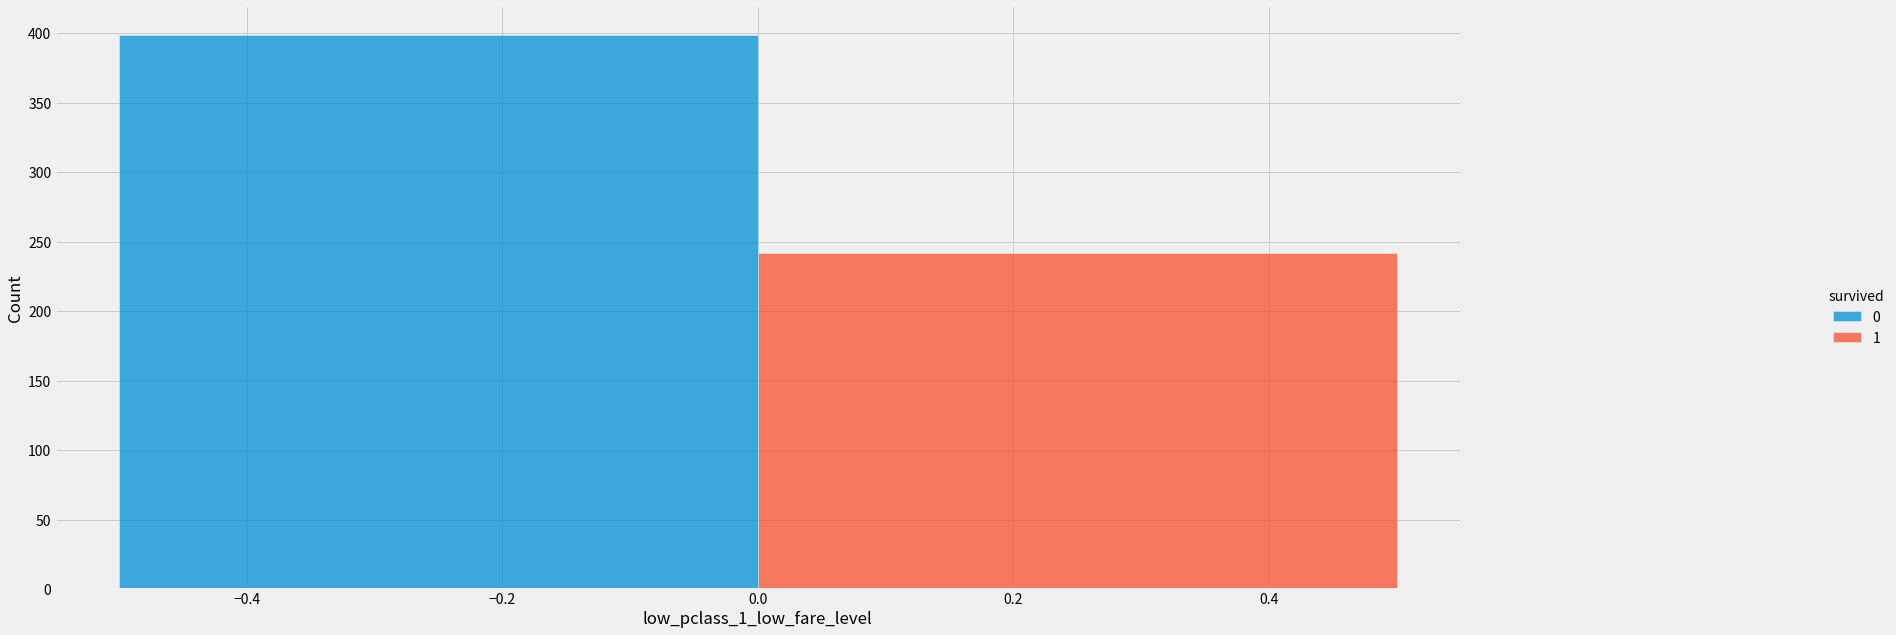

In [50]:
fig = sns.displot(train, x="low_pclass_1_low_fare_level", hue="survived", multiple="dodge")
fig.fig.set_size_inches(30,10)

## family

In [51]:
train['family'] = train['sibsp']+train['parch']+1
test['family'] = train['sibsp']+train['parch']+1
ori_te['family'] = train['sibsp']+train['parch']+1

In [52]:
def family_size(family):
    if family == 1:
      result = 'alone'
    elif (family == 2) or (family ==3) or (family ==4)  :
      result = 'small'
    elif (family ==5) or (family ==6) :
      result = 'medium'
    else :
      result = 'large'
    return result

train['family_size'] = train['family'].map(lambda x: family_size(x))
test['family_size'] = test['family'].map(lambda x: family_size(x))
ori_te['family_size'] = ori_te['family'].map(lambda x: family_size(x))
train['family_size'].value_counts()

alone     398
small     206
medium     25
large      12
Name: family_size, dtype: int64

In [53]:
def family_alone(family):
    if family == 1:
      result = 'alone'
    else :
      result = 'not alone'
    return result

train['family_alone'] = train['family'].map(lambda x: family_alone(x))
test['family_alone'] = test['family'].map(lambda x: family_alone(x))
ori_te['family_alone'] = ori_te['family'].map(lambda x: family_alone(x))
train['family_alone'].value_counts()

alone        398
not alone    243
Name: family_alone, dtype: int64

## sibsp

In [54]:
def add_sibsp(sibsp):
  result = 'small sib'
  try:
    if sibsp >=2 :
      result = 'large sib'
  except:
    pass
  return result

train['sibsp_2_high'] = train['sibsp'].map(lambda x: add_sibsp(x))
test['sibsp_2_high'] = test['sibsp'].map(lambda x: add_sibsp(x))
ori_te['sibsp_2_high'] = ori_te['sibsp'].map(lambda x: add_sibsp(x))

In [55]:
train['sibsp_2_high_gender'] = train.apply(lambda row: row['sibsp_2_high']+'_'+row['gender'], axis=1)
test['sibsp_2_high_gender'] = test.apply(lambda row: row['sibsp_2_high']+'_'+row['gender'], axis=1)
ori_te['sibsp_2_high_gender'] = ori_te.apply(lambda row: row['sibsp_2_high']+'_'+row['gender'], axis=1)

In [56]:
train['sibsp_2_high_gender'].value_counts()

small sib_male      389
small sib_female    199
large sib_male       31
large sib_female     22
Name: sibsp_2_high_gender, dtype: int64

In [57]:
def sib_female(sibsp_2_high_gender):
    if sibsp_2_high_gender == 'small sib_female':
      result = 'sibsp 2명이하 여자'
    elif sibsp_2_high_gender == 'large sib_female'  :
      result = 'sibsp 2명이상 여자'
    else :
      result = 'others'
    return result

train['sib_female'] = train['sibsp_2_high_gender'].map(lambda x: sib_female(x))
test['sib_female'] = test['sibsp_2_high_gender'].map(lambda x: sib_female(x))
ori_te['sib_female'] = ori_te['sibsp_2_high_gender'].map(lambda x: sib_female(x))

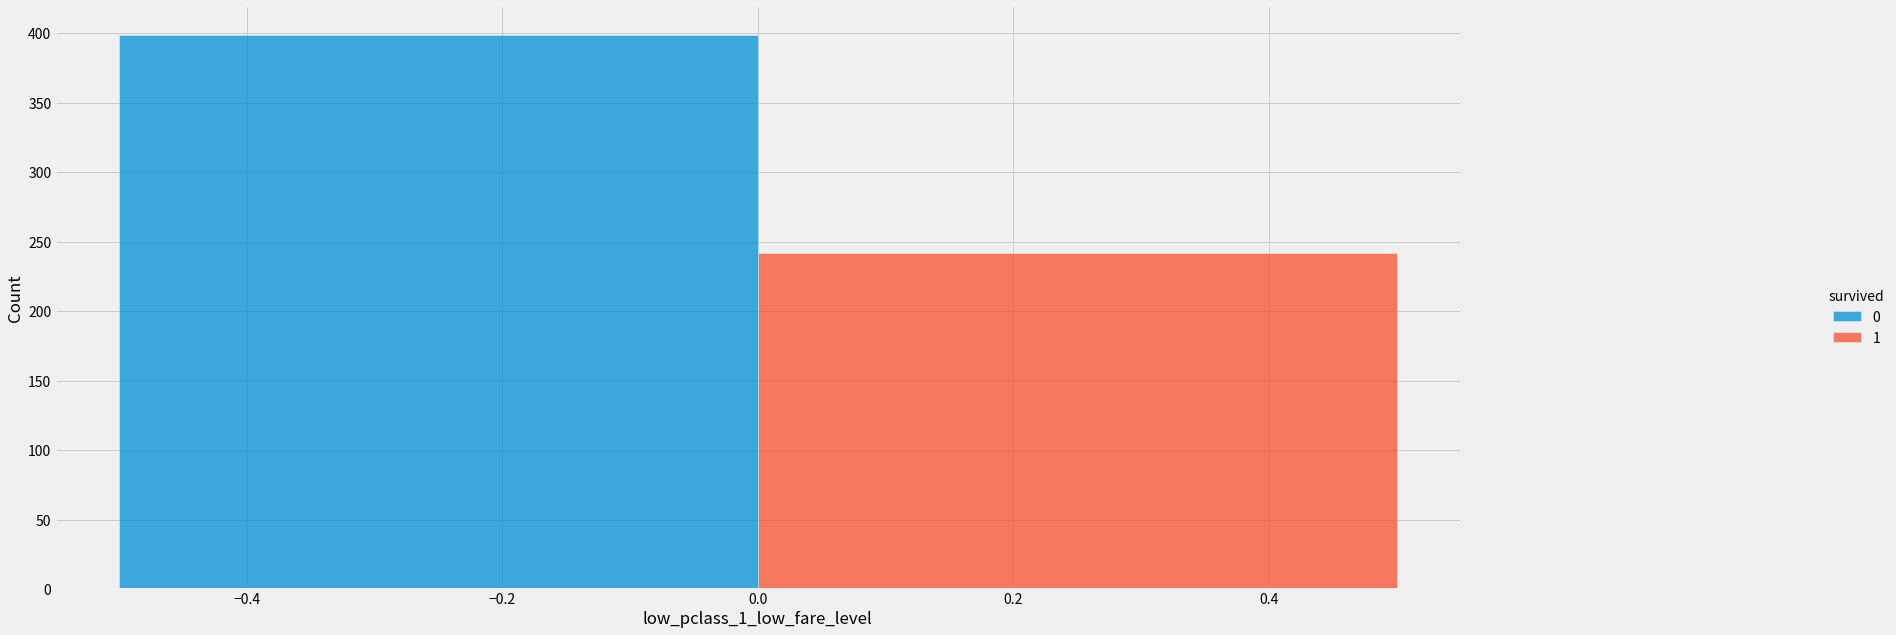

In [58]:
fig = sns.displot(train, x="low_pclass_1_low_fare_level", hue="survived", multiple="dodge")
fig.fig.set_size_inches(30,10)

## name

In [59]:
train['name_len'] = train['name'].map(lambda x : len(x))
test['name_len'] = test['name'].map(lambda x : len(x))
ori_te['name_len'] = ori_te['name'].map(lambda x : len(x))

In [60]:
def name_len_group(name_len) :
  result = 0
  if name_len <=  20 :
    result = 0
  elif name_len > 20 and name_len <= 25 :
    result = 1
  elif name_len > 25 and name_len <= 31 :
    result = 2
  else :
    result = 3
  return result

train['name_len_group'] = train['name_len'].map(lambda x: name_len_group(x))
test['name_len_group'] = test['name_len'].map(lambda x: name_len_group(x))
ori_te['name_len_group'] = ori_te['name_len'].map(lambda x: name_len_group(x))


## embarked

In [61]:
train['embarked_gender'] = train.apply(lambda row: row['embarked']+'_'+row['gender'], axis=1)
test['embarked_gender'] = test.apply(lambda row: row['embarked']+'_'+row['gender'], axis=1)
ori_te['embarked_gender'] = ori_te.apply(lambda row: row['embarked']+'_'+row['gender'], axis=1)

In [62]:
train['embarked_gender'].value_counts()

S_male      313
S_female    144
C_male       79
C_female     48
Q_female     29
Q_male       28
Name: embarked_gender, dtype: int64

In [63]:
def SQ_embarked_gender(embarked_gender):
    if embarked_gender == 'S_female':
      result = 'S 여자'
    elif embarked_gender == 'Q_female'  :
      result = 'Q 여자'
    else :
      result = 'others'
    return result

train['SQ_embarked_gender'] = train['embarked_gender'].map(lambda x: SQ_embarked_gender(x))
test['SQ_embarked_gender'] = test['embarked_gender'].map(lambda x: SQ_embarked_gender(x))
ori_te['SQ_embarked_gender'] = ori_te['embarked_gender'].map(lambda x: SQ_embarked_gender(x))

In [64]:
def embarked_Q_only(embarked) :
  if embarked =='S' :
    result = 'S 탑승지'
  else:
    result = '그외 탑승지'
  return result

train['embarked_Q_only'] = train['embarked'].map(lambda x: embarked_Q_only(x))
test['embarked_Q_only'] = test['embarked'].map(lambda x: embarked_Q_only(x))
ori_te['embarked_Q_only'] = ori_te['embarked'].map(lambda x: embarked_Q_only(x))


In [65]:
def embarked_C_only(embarked) :
  if embarked =='C' :
    result = 'C 탑승지'
  else:
    result = '그외 탑승지'
  return result

train['embarked_C_only'] = train['embarked'].map(lambda x: embarked_C_only(x))
test['embarked_C_only'] = test['embarked'].map(lambda x: embarked_C_only(x))
ori_te['embarked_C_only'] = ori_te['embarked'].map(lambda x: embarked_C_only(x))


In [66]:
train.columns

Index(['survived', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'social', 'new_age', 'infant', 'gender_infant',
       'female_gender_infant', 'add_pclass_1_level', 'pclass1_gender',
       'male_add_pclass_1', 'pclass_3_level', 'pclass3_infant',
       'low_pclass_infant', 'pclass3_gender', 'low_pclass_gender',
       'fare_leval2', 'pclass_1_fare_level', 'low_pclass_1_low_fare_level',
       'family', 'family_size', 'family_alone', 'sibsp_2_high',
       'sibsp_2_high_gender', 'sib_female', 'name_len', 'name_len_group',
       'embarked_gender', 'SQ_embarked_gender', 'embarked_Q_only',
       'embarked_C_only'],
      dtype='object')

In [67]:
train.drop(['gender_infant','pclass1_gender','pclass_3_level','pclass3_infant','pclass3_gender','sibsp_2_high','sibsp_2_high_gender',
           'low_pclass_1_low_fare_level','embarked_gender'], axis=1, inplace=True)
test.drop(['gender_infant','pclass1_gender','pclass_3_level','pclass3_infant','pclass3_gender','sibsp_2_high','sibsp_2_high_gender',
           'low_pclass_1_low_fare_level','embarked_gender'], axis=1, inplace=True)
ori_te.drop(['gender_infant','pclass1_gender','pclass_3_level','pclass3_infant','pclass3_gender','sibsp_2_high','sibsp_2_high_gender',
           'low_pclass_1_low_fare_level','embarked_gender'], axis=1, inplace=True)

In [68]:
train.drop(['name'],axis=1,inplace=True)
test.drop(['name'],axis=1,inplace=True)
ori_te.drop(['name'],axis=1,inplace=True)

In [69]:
train.shape , test.shape , ori_te.shape

((641, 27), (275, 27), (393, 26))

In [70]:
train.reset_index(drop=True , inplace=True)
test.reset_index(drop=True , inplace=True)

# 분리

In [71]:
y_tr = train['survived']
X_tr = train.drop(['survived'], axis=1)

y_te = test['survived']
X_te = test.drop(['survived'], axis=1)

X_tr.shape, y_tr.shape, X_te.shape, y_te.shape

((641, 26), (641,), (275, 26), (275,))

In [72]:
X_tr.reset_index(drop=True , inplace=True)

In [73]:
train = X_tr.copy()
test = X_te.copy()

In [74]:
train.reset_index(drop=True , inplace=True)
test.reset_index(drop=True , inplace=True)

# data encoding

In [75]:
from sklearn.preprocessing import OneHotEncoder

In [76]:
enc_cols = list(train.select_dtypes(exclude=np.number).columns) # 범주형 
normal_cols = list(set(train.columns) - set(enc_cols))
normal_cols

['age',
 'fare',
 'low_pclass_infant',
 'pclass',
 'name_len_group',
 'female_gender_infant',
 'parch',
 'low_pclass_gender',
 'sibsp',
 'family',
 'fare_leval2',
 'male_add_pclass_1',
 'name_len']

In [77]:
train.drop(['name_len'], axis=1, inplace=True)
test.drop(['name_len'], axis=1, inplace=True)
ori_te.drop(['name_len'], axis=1, inplace=True)

In [78]:
train.columns

Index(['pclass', 'gender', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'social', 'new_age', 'infant', 'female_gender_infant',
       'add_pclass_1_level', 'male_add_pclass_1', 'low_pclass_infant',
       'low_pclass_gender', 'fare_leval2', 'pclass_1_fare_level', 'family',
       'family_size', 'family_alone', 'sib_female', 'name_len_group',
       'SQ_embarked_gender', 'embarked_Q_only', 'embarked_C_only'],
      dtype='object')

In [79]:
cols=['pclass', 'gender',  'sibsp', 'parch',  'embarked',
       'social', 'new_age', 'infant', 'female_gender_infant',
       'add_pclass_1_level', 'male_add_pclass_1', 'low_pclass_infant',
       'low_pclass_gender', 'fare_leval2', 'pclass_1_fare_level', 'family',
       'family_size', 'family_alone', 'sib_female', 'name_len_group',
       'SQ_embarked_gender', 'embarked_Q_only', 'embarked_C_only']
normal_cols = list(set(train.columns) - set(cols))

In [80]:
enc = OneHotEncoder(handle_unknown = 'ignore')

tmp_tr = pd.DataFrame(
    enc.fit_transform(train[cols]).toarray(), #범주형 encoder 적용시켜서 temp_tr에 저장
    columns = enc.get_feature_names_out() # feature name을 뽑아냄 
)  
enc_tr = pd.concat(
    [train[normal_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
) 
# 수치형 데이터(train[normal_cols]) + encoding 된 문자형 데이터(tmp_tr) 를 합쳐서 enc_tr



# test (ori_te 에서 나온 te  -> 모델의 학습을 평가(잘했는지 못했는지))
tmp_te = pd.DataFrame(
    enc.transform(test[cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_te = pd.concat(
    [test[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)


# ori_test
tmp_te = pd.DataFrame(
    enc.transform(ori_te[cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_ori_te = pd.concat(
    [ori_te[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)
print(f'before: {train.shape} / {test.shape} / {ori_te.shape}')
print(f'after: {enc_tr.shape} / {enc_te.shape} / {enc_ori_te.shape}')

before: (641, 25) / (275, 25) / (393, 25)
after: (641, 76) / (275, 76) / (393, 76)


In [81]:
scaling_cols = ['fare','age']
not_scaling_cols = list(set(enc_tr.columns) - set(scaling_cols))

from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
_scaled_tr = rbs.fit_transform(enc_tr[scaling_cols])
_scaled_te = rbs.transform(enc_te[scaling_cols])
_scaled_ori_te = rbs.transform(enc_ori_te[scaling_cols])

print(f'before: {enc_tr.shape} / {enc_te.shape} / {enc_ori_te}')
# train
tmp_tr = pd.DataFrame(
    _scaled_tr, 
    columns = scaling_cols
)
scaled_tr = pd.concat(
    [enc_tr[not_scaling_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)
# test
tmp_te = pd.DataFrame(
    _scaled_te, 
    columns = scaling_cols
)
scaled_te = pd.concat(
    [enc_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)
# ori_test
tmp_te = pd.DataFrame(
    _scaled_ori_te, 
    columns = scaling_cols
)
scaled_ori_te = pd.concat(
    [enc_ori_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)

print(f'after: {scaled_tr.shape} / {scaled_te.shape} / {scaled_ori_te.shape}' )

before: (641, 76) / (275, 76) /       age      fare  pclass_1  pclass_2  pclass_3  gender_female  gender_male  \
0    15.0    8.0292       0.0       0.0       1.0            1.0          0.0   
1    32.0   13.0000       0.0       1.0       0.0            1.0          0.0   
2    28.0    7.7500       0.0       0.0       1.0            1.0          0.0   
3    28.0    7.2500       0.0       0.0       1.0            0.0          1.0   
4    45.0  164.8667       1.0       0.0       0.0            1.0          0.0   
..    ...       ...       ...       ...       ...            ...          ...   
388  28.0    7.7500       0.0       0.0       1.0            1.0          0.0   
389  16.0   57.9792       1.0       0.0       0.0            1.0          0.0   
390  13.0    7.2292       0.0       0.0       1.0            1.0          0.0   
391  39.0   31.2750       0.0       0.0       1.0            1.0          0.0   
392  26.0    7.8542       0.0       0.0       1.0            1.0          0.0

In [82]:
scaled_tr.isnull().sum() , y_tr.isnull().sum()

(family_size_small         0
 sibsp_0                   0
 sib_female_others         0
 female_gender_infant_1    0
 embarked_S                0
                          ..
 family_8                  0
 embarked_C_only_C 탑승지     0
 family_alone_alone        0
 fare                      0
 age                       0
 Length: 76, dtype: int64,
 0)

In [87]:
modelV7 = CatBoostClassifier(random_state=21)

modelV7.fit(scaled_tr,y_tr)

Learning rate set to 0.00852
0:	learn: 0.6857475	total: 152ms	remaining: 2m 31s
1:	learn: 0.6791261	total: 162ms	remaining: 1m 20s
2:	learn: 0.6718632	total: 167ms	remaining: 55.5s
3:	learn: 0.6648196	total: 172ms	remaining: 42.7s
4:	learn: 0.6597783	total: 174ms	remaining: 34.6s
5:	learn: 0.6530774	total: 178ms	remaining: 29.5s
6:	learn: 0.6458747	total: 182ms	remaining: 25.9s
7:	learn: 0.6406857	total: 185ms	remaining: 23s
8:	learn: 0.6349187	total: 189ms	remaining: 20.8s
9:	learn: 0.6294689	total: 192ms	remaining: 19s
10:	learn: 0.6242541	total: 194ms	remaining: 17.5s
11:	learn: 0.6186468	total: 197ms	remaining: 16.2s
12:	learn: 0.6128091	total: 201ms	remaining: 15.2s
13:	learn: 0.6069372	total: 204ms	remaining: 14.3s
14:	learn: 0.6016080	total: 207ms	remaining: 13.6s
15:	learn: 0.5969636	total: 209ms	remaining: 12.9s
16:	learn: 0.5918472	total: 213ms	remaining: 12.3s
17:	learn: 0.5866357	total: 216ms	remaining: 11.8s
18:	learn: 0.5815251	total: 219ms	remaining: 11.3s
19:	learn: 0.5

# model 7

In [344]:
from xgboost import XGBClassifier,plot_importance
from lightgbm import LGBMClassifier, plot_importance
from catboost import CatBoostClassifier

In [345]:
modelV7 = CatBoostClassifier(random_state=21)

modelV7.fit(scaled_tr,y_tr)

Learning rate set to 0.00852
0:	learn: 0.6857475	total: 3.28ms	remaining: 3.28s
1:	learn: 0.6791261	total: 6.68ms	remaining: 3.33s
2:	learn: 0.6718632	total: 11.5ms	remaining: 3.83s
3:	learn: 0.6648196	total: 15.3ms	remaining: 3.81s
4:	learn: 0.6597783	total: 16.9ms	remaining: 3.36s
5:	learn: 0.6530774	total: 20.6ms	remaining: 3.41s
6:	learn: 0.6458747	total: 24.8ms	remaining: 3.52s
7:	learn: 0.6406857	total: 28.6ms	remaining: 3.55s
8:	learn: 0.6349187	total: 31.9ms	remaining: 3.51s
9:	learn: 0.6294689	total: 35.1ms	remaining: 3.48s
10:	learn: 0.6242541	total: 38ms	remaining: 3.42s
11:	learn: 0.6186468	total: 42.6ms	remaining: 3.5s
12:	learn: 0.6128091	total: 45.9ms	remaining: 3.48s
13:	learn: 0.6069372	total: 49.9ms	remaining: 3.51s
14:	learn: 0.6016080	total: 53.9ms	remaining: 3.54s
15:	learn: 0.5969636	total: 56.4ms	remaining: 3.47s
16:	learn: 0.5918472	total: 58.7ms	remaining: 3.39s
17:	learn: 0.5866357	total: 61.4ms	remaining: 3.35s
18:	learn: 0.5815251	total: 64.5ms	remaining: 3.

In [346]:
scaled_tr.columns

Index(['family_size_small', 'sibsp_0', 'sib_female_others',
       'female_gender_infant_1', 'embarked_S', 'female_gender_infant_0',
       'low_pclass_infant_0', 'family_11', 'fare_leval2_0', 'family_1',
       'new_age_중년', 'parch_0', 'pclass_3', 'family_2', 'family_4',
       'name_len_group_1', 'fare_leval2_1', 'pclass_1', 'new_age_젋은이',
       'add_pclass_1_level_low pcalss(2,3)', 'new_age_어린이',
       'pclass_1_fare_level_high pclass(1)_0', 'SQ_embarked_gender_S 여자',
       'embarked_C_only_그외 탑승지', 'embarked_Q_only_그외 탑승지', 'parch_4',
       'family_3', 'family_alone_not alone',
       'pclass_1_fare_level_high pclass(1)_1',
       'pclass_1_fare_level_low pcalss(2,3)_1', 'parch_2', 'parch_3',
       'family_6', 'sibsp_5', 'family_7', 'infant_infant', 'name_len_group_0',
       'family_size_large', 'sibsp_3', 'infant_not infant',
       'SQ_embarked_gender_Q 여자', 'parch_6', 'male_add_pclass_1_0', 'parch_1',
       'embarked_C', 'sibsp_1', 'embarked_Q', 'new_age_노년', 'family_5',


In [347]:
score_tr7 = modelV7.score(scaled_tr, y_tr)
score_te7 = modelV7.score(scaled_te, y_te) 

score_tr7, score_te7  

(0.9282371294851794, 0.8363636363636363)

In [348]:
from sklearn.metrics import roc_curve, auc 

y_pred = modelV7.predict_proba(scaled_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.909665991902834


In [349]:
X_tr_pred = modelV7.predict(scaled_tr)

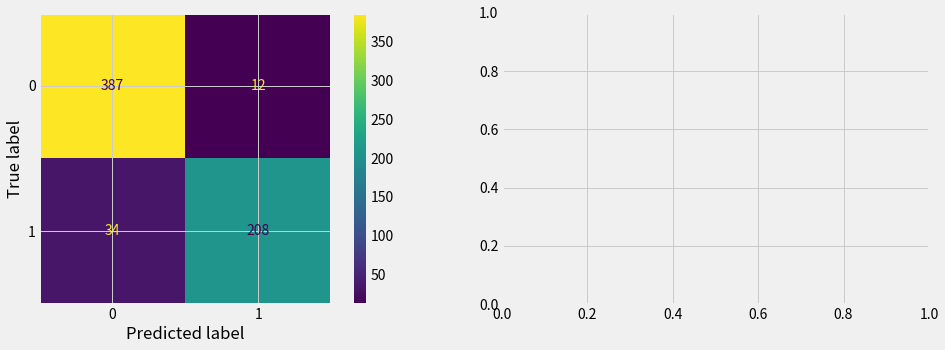

In [350]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig , ax = plt.subplots(1,2,figsize=(15,5))

cm = confusion_matrix(y_tr,X_tr_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])

plt.show()

In [351]:
df_feature_importances = pd.DataFrame(modelV7.feature_importances_, scaled_tr.columns).sort_values(by=[0], ascending=False).reset_index()

In [352]:
df_feature_importances.columns

Index(['index', 0], dtype='object')

In [353]:
df_feature_importances = df_feature_importances.sort_values(0)

In [375]:
df_feature_importances = df_feature_importances[df_feature_importances[0]>=1]

In [378]:
df_feature_importances['index'].values

array(['embarked_C', 'add_pclass_1_level_low pcalss(2,3)',
       'family_size_small', 'social_사회초년생', 'SQ_embarked_gender_S 여자',
       'male_add_pclass_1_0', 'pclass_1_fare_level_low pcalss(2,3)_1',
       'sibsp_0', 'sibsp_1', 'pclass_2', 'parch_0', 'new_age_정상나이',
       'social_ohters', 'male_add_pclass_1_1', 'name_len_group_2',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_0',
       'name_len_group_1', 'name_len_group_3', 'pclass_3',
       'sib_female_sibsp 2명이하 여자', 'age', 'fare', 'gender_female',
       'sib_female_others'], dtype=object)

# model 8

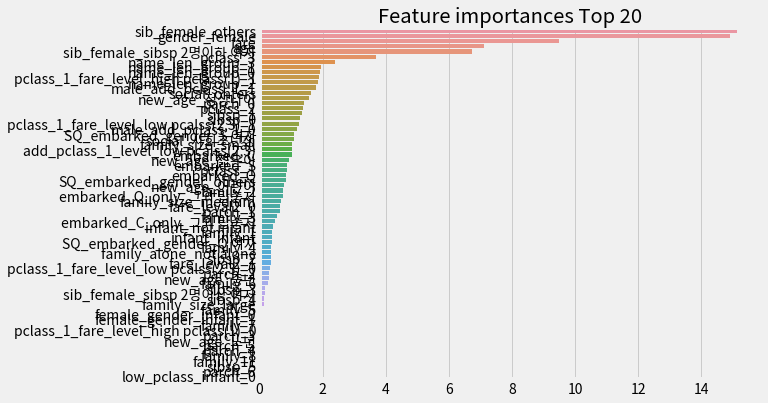

In [356]:
importances_values = modelV7.feature_importances_
importances = pd.Series(importances_values, index=scaled_tr.columns)
top = importances.sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top, y = top.index)
plt.show()

In [95]:
top_index = top.index

In [96]:
top_index

Index(['sib_female_others', 'gender_female', 'fare', 'age',
       'sib_female_sibsp 2명이하 여자', 'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2',
       'male_add_pclass_1_1', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1', 'male_add_pclass_1_0'],
      dtype='object')

# drop 지우기 시도

In [395]:
drop_tr = scaled_tr[['embarked_C', 'add_pclass_1_level_low pcalss(2,3)',
       'family_size_small', 'social_사회초년생', 'SQ_embarked_gender_S 여자',
       'male_add_pclass_1_0', 'pclass_1_fare_level_low pcalss(2,3)_1',
       'sibsp_0', 'sibsp_1', 'pclass_2', 'parch_0', 'new_age_정상나이',
       'social_ohters', 'male_add_pclass_1_1', 'name_len_group_2',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_0',
       'name_len_group_1', 'name_len_group_3', 'pclass_3',
       'sib_female_sibsp 2명이하 여자', 'age', 'fare', 'gender_female',
       'sib_female_others']]
drop_te = scaled_te[['embarked_C', 'add_pclass_1_level_low pcalss(2,3)',
       'family_size_small', 'social_사회초년생', 'SQ_embarked_gender_S 여자',
       'male_add_pclass_1_0', 'pclass_1_fare_level_low pcalss(2,3)_1',
       'sibsp_0', 'sibsp_1', 'pclass_2', 'parch_0', 'new_age_정상나이',
       'social_ohters', 'male_add_pclass_1_1', 'name_len_group_2',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_0',
       'name_len_group_1', 'name_len_group_3', 'pclass_3',
       'sib_female_sibsp 2명이하 여자', 'age', 'fare', 'gender_female',
       'sib_female_others']]
drop_ori_te = scaled_ori_te[['embarked_C', 'add_pclass_1_level_low pcalss(2,3)',
       'family_size_small', 'social_사회초년생', 'SQ_embarked_gender_S 여자',
       'male_add_pclass_1_0', 'pclass_1_fare_level_low pcalss(2,3)_1',
       'sibsp_0', 'sibsp_1', 'pclass_2', 'parch_0', 'new_age_정상나이',
       'social_ohters', 'male_add_pclass_1_1', 'name_len_group_2',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_0',
       'name_len_group_1', 'name_len_group_3', 'pclass_3',
       'sib_female_sibsp 2명이하 여자', 'age', 'fare', 'gender_female',
       'sib_female_others']]

In [259]:
# drop_tr = scaled_tr[['sib_female_others', 'fare', 'age',
#        'pclass_3', 'name_len_group_3',
#        'name_len_group_1', 'name_len_group_0',
#        'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
#        'pclass_2', 'sibsp_1', 'sibsp_0',
#        'pclass_1_fare_level_low pcalss(2,3)_1']]
# drop_te = scaled_te[['sib_female_others', 'fare', 'age',
#        'pclass_3', 'name_len_group_3',
#        'name_len_group_1', 'name_len_group_0',
#        'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
#        'pclass_2', 'sibsp_1', 'sibsp_0',
#        'pclass_1_fare_level_low pcalss(2,3)_1']]
# drop_ori_te = scaled_ori_te[['sib_female_others', 'fare', 'age',
#        'pclass_3', 'name_len_group_3',
#        'name_len_group_1', 'name_len_group_0',
#        'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
#        'pclass_2', 'sibsp_1', 'sibsp_0',
#        'pclass_1_fare_level_low pcalss(2,3)_1']]

                                       sib_female_others      fare       age  \
sib_female_others                               1.000000 -0.116502  0.054606   
fare                                           -0.116502  1.000000  0.148851   
age                                             0.054606  0.148851  1.000000   
pclass_3                                        0.095279 -0.410263 -0.363703   
name_len_group_3                               -0.458761  0.109119  0.085571   
name_len_group_1                                0.100210  0.001318  0.012512   
name_len_group_0                                0.191065 -0.119124 -0.003503   
pclass_1_fare_level_high pclass(1)_1           -0.088616  0.621694  0.363591   
name_len_group_2                                0.141798  0.016872 -0.090003   
male_add_pclass_1_1                             0.733355 -0.365242 -0.170695   
social_ohters                                  -0.051948  0.084312  0.124830   
new_age_정상나이                            

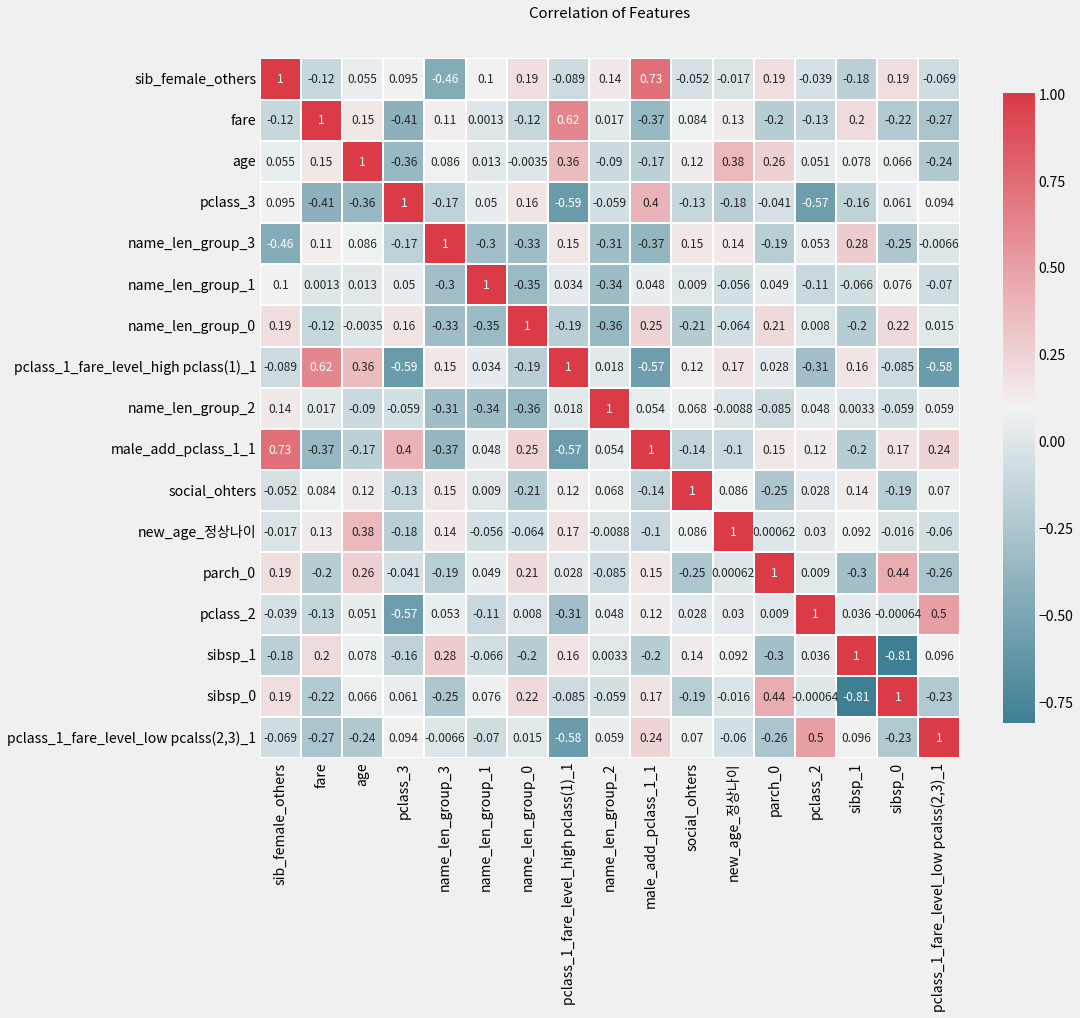

In [166]:
def draw_correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Correlation of Features', y=1.05, size=15)
    print(df.corr())
    
draw_correlation_heatmap(drop_tr)

## drop 노가다

In [289]:
def drop_col(data, column):
    _ = []
    for df in data:
        drop_df = df.drop(column, axis = 1)
        _.append(drop_df)    
    return _

drop_column = drop_col([scaled_tr, scaled_te, scaled_ori_te], 'age')
# _1 = drop_column[0]
# _2 = drop_column[1]
# _3 = drop_column[2]
# _1
drop_column

[     family_size_small  sibsp_0  sib_female_others  female_gender_infant_1  \
 0                  0.0      1.0                1.0                     0.0   
 1                  0.0      1.0                0.0                     0.0   
 2                  0.0      1.0                1.0                     0.0   
 3                  1.0      0.0                1.0                     0.0   
 4                  0.0      1.0                1.0                     0.0   
 ..                 ...      ...                ...                     ...   
 636                0.0      1.0                1.0                     0.0   
 637                1.0      0.0                0.0                     0.0   
 638                1.0      1.0                0.0                     0.0   
 639                0.0      1.0                1.0                     0.0   
 640                1.0      0.0                1.0                     0.0   
 
      embarked_S  female_gender_infant_0  low_pcla

In [201]:
# 'pclass_1_fare_level_low pcalss(2,3)_1' 지운다
drop_tr_1 = scaled_tr[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',]]
drop_te_1 = scaled_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',]]
drop_ori_te1 = scaled_ori_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',]]

In [202]:
# sibsp_0 지운다
drop_tr_2 = scaled_tr[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_te_2 = scaled_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_ori_te_2 = scaled_ori_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 
       'pclass_1_fare_level_low pcalss(2,3)_1']]

In [219]:
#sibsp_1 지운다
drop_tr3 = scaled_tr[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_te3 = scaled_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_ori_te3 = scaled_ori_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]

In [204]:
#'pclass_2' 지운다
drop_tr4 = scaled_tr[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_te4 = scaled_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_ori_te4 = scaled_ori_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]

In [205]:
#'parch_0' 지운다
drop_tr5 = scaled_tr[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이','pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_te5 = scaled_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이','pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_ori_te5 = scaled_ori_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이','pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]

In [206]:
# 'new_age_정상나이' 지운다
drop_tr6 = scaled_tr[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters',  'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_te6 = scaled_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_ori_te6 = scaled_ori_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters','parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]

In [207]:
# 'social_ohters' 지운다
drop_tr7 = scaled_tr[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2',  'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_te7 = scaled_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_ori_te7 = scaled_ori_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2','new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]

In [208]:
# 'name_len_group_2',지운다
drop_tr8 = scaled_tr[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1',  'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_te8 = scaled_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_ori_te8 = scaled_ori_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1',  'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]

In [209]:
# 'pclass_1_fare_level_high pclass(1)_1', 지운다
drop_tr9 = scaled_tr[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
        'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_te9 = scaled_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
        'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_ori_te9 = scaled_ori_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
        'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]

In [210]:
# name_len_group_0'
drop_tr10 = scaled_tr[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_te10 = scaled_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_ori_te10 = scaled_ori_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]

In [211]:
# 'name_len_group_1', 
drop_tr11 = scaled_tr[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_te11 = scaled_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_ori_te11 = scaled_ori_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]

In [212]:
#  'name_len_group_3'
drop_tr12 = scaled_tr[['sib_female_others', 'fare', 'age',
       'pclass_3', 
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_te12 = scaled_te[['sib_female_others', 'fare', 'age',
       'pclass_3', 
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_ori_te12 = scaled_ori_te[['sib_female_others', 'fare', 'age',
       'pclass_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]

In [213]:
# 'pclass_3', 
drop_tr13 = scaled_tr[['sib_female_others', 'fare', 'age',
        'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_te13 = scaled_te[['sib_female_others', 'fare', 'age',
      'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_ori_te13 = scaled_ori_te[['sib_female_others', 'fare', 'age',
       'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]

In [214]:
# age
drop_tr14 = scaled_tr[['sib_female_others', 'fare', 
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_te14 = scaled_te[['sib_female_others', 'fare', 
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_ori_te14 = scaled_ori_te[['sib_female_others', 'fare', 
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]

In [215]:
#fare
drop_tr15 = scaled_tr[['sib_female_others', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_te15 = scaled_te[['sib_female_others',  'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_ori_te15 = scaled_ori_te[['sib_female_others','age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]

In [216]:
# 'sib_female_others', 
drop_tr16 = scaled_tr[['fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_te16 = scaled_te[['fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]
drop_ori_te16 = scaled_ori_te[[ 'fare', 'age',
       'pclass_3', 'name_len_group_3',
       'name_len_group_1', 'name_len_group_0',
       'pclass_1_fare_level_high pclass(1)_1', 'name_len_group_2', 'social_ohters', 'new_age_정상나이', 'parch_0',
       'pclass_2', 'sibsp_1', 'sibsp_0',
       'pclass_1_fare_level_low pcalss(2,3)_1']]

In [ ]:
from xgboost import XGBClassifier,plot_importance
from lightgbm import LGBMClassifier, plot_importance
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## RandomForestClassifier

In [ ]:
modelV7 = RandomForestClassifier(random_state=21)
modelV7.fit(drop_tr,y_tr)

In [ ]:
score_tr7 = modelV7.score(drop_tr, y_tr)
score_te7 = modelV7.score(drop_te, y_te) 
score_tr7, score_te7 

In [ ]:
from sklearn.metrics import roc_curve, auc 

y_pred7 = modelV7.predict_proba(drop_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred7)
auc_te7 = auc(fpr, tpr)
print(f'model: {auc_te7}')

In [ ]:
ori_te_pred7 = modelV7.predict_proba(drop_ori_te)[:,1]
ori_te_pred7.shape

In [ ]:
X_tr_pred = modelV7.predict(drop_tr)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig , ax = plt.subplots(1,2,figsize=(15,5))

cm = confusion_matrix(y_tr,X_tr_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])

plt.show()

## cat boost

In [396]:
modelV7 = CatBoostClassifier(random_state=21)
modelV7.fit(drop_tr,y_tr)

Learning rate set to 0.00852
0:	learn: 0.6860743	total: 2.85ms	remaining: 2.85s
1:	learn: 0.6791219	total: 6.05ms	remaining: 3.02s
2:	learn: 0.6715283	total: 9.1ms	remaining: 3.02s
3:	learn: 0.6649717	total: 12.2ms	remaining: 3.04s
4:	learn: 0.6593297	total: 14.6ms	remaining: 2.91s
5:	learn: 0.6532486	total: 17.2ms	remaining: 2.85s
6:	learn: 0.6460934	total: 20.7ms	remaining: 2.94s
7:	learn: 0.6399828	total: 26ms	remaining: 3.22s
8:	learn: 0.6351018	total: 28.9ms	remaining: 3.18s
9:	learn: 0.6301437	total: 31.5ms	remaining: 3.11s
10:	learn: 0.6251316	total: 34.7ms	remaining: 3.12s
11:	learn: 0.6192777	total: 38.8ms	remaining: 3.19s
12:	learn: 0.6130493	total: 43.1ms	remaining: 3.27s
13:	learn: 0.6074797	total: 49.1ms	remaining: 3.46s
14:	learn: 0.6024227	total: 51.7ms	remaining: 3.4s
15:	learn: 0.5971259	total: 56ms	remaining: 3.44s
16:	learn: 0.5920833	total: 61ms	remaining: 3.52s
17:	learn: 0.5879113	total: 62.9ms	remaining: 3.43s
18:	learn: 0.5831675	total: 66.4ms	remaining: 3.43s
1

In [397]:
score_tr7 = modelV7.score(drop_tr, y_tr)
score_te7 = modelV7.score(drop_te, y_te) 
score_tr7, score_te7 

(0.9391575663026521, 0.8436363636363636)

In [398]:
from sklearn.metrics import roc_curve, auc 

y_pred7 = modelV7.predict_proba(drop_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred7)
auc_te7 = auc(fpr, tpr)
print(f'model: {auc_te7}')

model: 0.9136583445793972


In [399]:
drop_tr.shape , drop_te.shape , drop_ori_te.shape

((641, 25), (275, 25), (393, 25))

In [400]:
X_tr_pred = modelV7.predict(drop_tr)

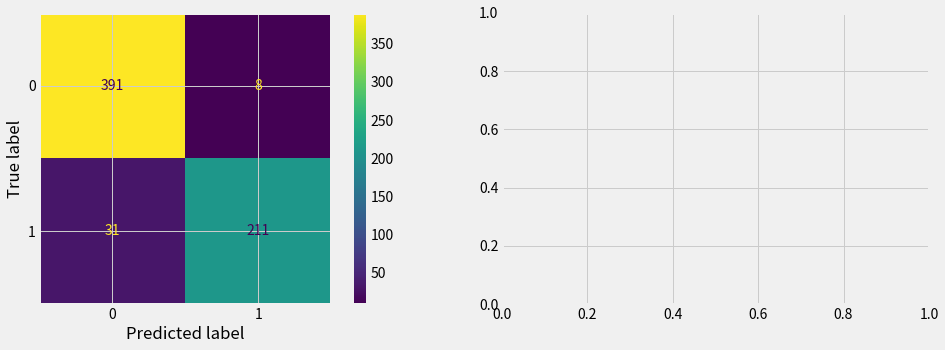

In [401]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig , ax = plt.subplots(1,2,figsize=(15,5))

cm = confusion_matrix(y_tr,X_tr_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])
plt.show()

In [402]:
ori_te_pred7 = modelV7.predict_proba(drop_ori_te)[:,1]
ori_te_pred7.shape

(393,)

In [403]:
drop_tr_pred7 = modelV7.predict_proba(drop_tr)[:,1]
drop_tr_pred7

array([0.15914807, 0.99063861, 0.0382613 , 0.05665533, 0.03614659,
       0.0752604 , 0.05096452, 0.16391245, 0.04451903, 0.9126126 ,
       0.10757988, 0.03933968, 0.90771744, 0.92447716, 0.10660652,
       0.90206554, 0.99209856, 0.0309617 , 0.04299115, 0.39644237,
       0.03703289, 0.2683832 , 0.45289587, 0.04438583, 0.96955504,
       0.18655396, 0.06216916, 0.9299676 , 0.06981177, 0.9009013 ,
       0.13240369, 0.05854768, 0.07501566, 0.0867673 , 0.08251678,
       0.08067392, 0.18007037, 0.03224076, 0.03200054, 0.06024051,
       0.70812933, 0.9515032 , 0.03469394, 0.94023898, 0.0905742 ,
       0.98720194, 0.11032813, 0.05311664, 0.88488401, 0.11593613,
       0.88979932, 0.05841674, 0.02925756, 0.03804886, 0.93560173,
       0.9593069 , 0.03354098, 0.04378549, 0.79979691, 0.81715194,
       0.216319  , 0.06076024, 0.75187105, 0.99451228, 0.92300456,
       0.05609488, 0.10631014, 0.99237183, 0.0378247 , 0.83339747,
       0.92933087, 0.02833309, 0.0569643 , 0.10998827, 0.07727

## 연습 cat boost

In [317]:
modelV7 = CatBoostClassifier(random_state=21)
modelV7.fit(drop_tr9,y_tr)

Learning rate set to 0.00852
0:	learn: 0.6853199	total: 2.78ms	remaining: 2.78s
1:	learn: 0.6778833	total: 5.92ms	remaining: 2.96s
2:	learn: 0.6712114	total: 8.72ms	remaining: 2.9s
3:	learn: 0.6637416	total: 11.9ms	remaining: 2.97s
4:	learn: 0.6576344	total: 14.9ms	remaining: 2.96s
5:	learn: 0.6517276	total: 17.6ms	remaining: 2.91s
6:	learn: 0.6455951	total: 21.6ms	remaining: 3.07s
7:	learn: 0.6404325	total: 24.9ms	remaining: 3.09s
8:	learn: 0.6337608	total: 31.6ms	remaining: 3.48s
9:	learn: 0.6283264	total: 35.9ms	remaining: 3.55s
10:	learn: 0.6221226	total: 42.4ms	remaining: 3.81s
11:	learn: 0.6171913	total: 46.2ms	remaining: 3.81s
12:	learn: 0.6115465	total: 50.1ms	remaining: 3.8s
13:	learn: 0.6054187	total: 53.1ms	remaining: 3.74s
14:	learn: 0.5994380	total: 56.9ms	remaining: 3.74s
15:	learn: 0.5943038	total: 60.1ms	remaining: 3.69s
16:	learn: 0.5896455	total: 62.2ms	remaining: 3.6s
17:	learn: 0.5854990	total: 64.6ms	remaining: 3.52s
18:	learn: 0.5796447	total: 69.2ms	remaining: 3.

In [318]:
score_tr7 = modelV7.score(drop_tr9, y_tr)
score_te7 = modelV7.score(drop_te9, y_te) 
score_tr7, score_te7 

(0.9297971918876755, 0.850909090909091)

In [319]:
from sklearn.metrics import roc_curve, auc 

y_pred7 = modelV7.predict_proba(drop_te9)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred7)
auc_te7 = auc(fpr, tpr)
print(f'model: {auc_te7}')

model: 0.9101158344579396


In [320]:
drop_tr.shape , drop_te.shape , drop_ori_te.shape

((641, 16), (275, 16), (393, 16))

In [321]:
X_tr_pred = modelV7.predict(drop_tr9)

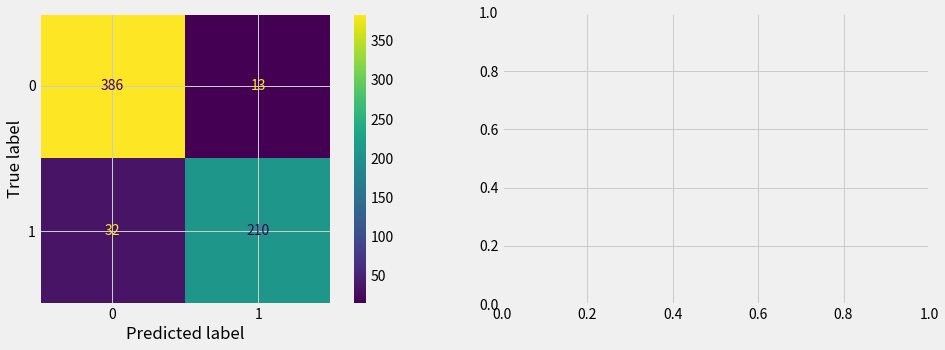

In [322]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig , ax = plt.subplots(1,2,figsize=(15,5))

cm = confusion_matrix(y_tr,X_tr_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])
plt.show()

In [108]:
ori_te_pred7 = modelV7.predict_proba(drop_ori_te)[:,1]
ori_te_pred7.shape

(393,)

In [105]:
drop_tr_pred7 = modelV7.predict_proba(drop_tr)[:,1]
drop_tr_pred7

array([0.18937973, 0.98624932, 0.04466889, 0.0579458 , 0.03689964,
       0.06968608, 0.04485521, 0.16807076, 0.02912077, 0.91677493,
       0.11572771, 0.04707999, 0.88295626, 0.92803082, 0.1098279 ,
       0.88405673, 0.99162992, 0.02665101, 0.03247258, 0.38784697,
       0.04724767, 0.24460651, 0.40697342, 0.04680943, 0.95869673,
       0.20916023, 0.05183278, 0.92512391, 0.05196434, 0.92612986,
       0.16352834, 0.06090026, 0.07973536, 0.08536108, 0.08508322,
       0.08919532, 0.17981078, 0.0306634 , 0.03873816, 0.05910945,
       0.70897483, 0.95001994, 0.03670105, 0.95041642, 0.10369629,
       0.98179062, 0.09908862, 0.04032346, 0.84600054, 0.11561267,
       0.88825548, 0.06861444, 0.02938259, 0.04424911, 0.91876326,
       0.95683269, 0.03795097, 0.03789667, 0.7927416 , 0.83048859,
       0.21720468, 0.05848316, 0.80575369, 0.99481241, 0.92045249,
       0.04058781, 0.11041587, 0.99091587, 0.03799935, 0.86144608,
       0.86670988, 0.02165086, 0.06868417, 0.10387983, 0.08019

## DecisionTreeClassifier

In [ ]:
modelV7 = DecisionTreeClassifier(random_state=21)
modelV7.fit(drop_tr,y_tr)

In [ ]:
score_tr7 = modelV7.score(drop_tr, y_tr)
score_te7 = modelV7.score(drop_te, y_te) 
score_tr7, score_te7 

In [ ]:
from sklearn.metrics import roc_curve, auc 

y_pred7 = modelV7.predict_proba(drop_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred7)
auc_te7 = auc(fpr, tpr)
print(f'model: {auc_te7}')

In [ ]:
ori_te_pred7 = modelV7.predict_proba(drop_ori_te)[:,1]
ori_te_pred7.shape

In [ ]:
X_tr_pred = modelV7.predict(drop_tr)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig , ax = plt.subplots(1,2,figsize=(15,5))

cm = confusion_matrix(y_tr,X_tr_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])

plt.show()

## XGBclassifier

In [ ]:
modelV7 = XGBClassifier(random_state=21)
modelV7.fit(drop_tr,y_tr)

In [ ]:
score_tr7 = modelV7.score(drop_tr, y_tr)
score_te7 = modelV7.score(drop_te, y_te) 
score_tr7, score_te7 

In [ ]:
from sklearn.metrics import roc_curve, auc 

y_pred7 = modelV7.predict_proba(drop_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred7)
auc_te7 = auc(fpr, tpr)
print(f'model: {auc_te7}')

In [ ]:
ori_te_pred7 = modelV7.predict_proba(drop_ori_te)[:,1]
ori_te_pred7.shape

In [ ]:
X_tr_pred = modelV7.predict(drop_tr)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig , ax = plt.subplots(1,2,figsize=(15,5))

cm = confusion_matrix(y_tr,X_tr_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])

plt.show()

## submission

In [404]:
args.results.append(
    {
        'model': 'modelV8',
        'score_tr': score_tr7,
        'score_te': score_te7,
        'auc_te': auc_te7,
        'ori_te_pred': ori_te_pred7,
        'len_features': drop_tr.shape[1],
        'feaute_importances': list(df_feature_importances['index'].values[:drop_tr.shape[1]]),
        'create_dt': '0409'
    }
)

In [405]:
df_results = pd.DataFrame(args.results)
df_results

,model,score_tr,score_te,auc_te,ori_te_pred,len_features,feaute_importances,create_dt
0,modelV6,0.934477,0.847273,0.914277,"[0.6835007207649534, 0.9572478873315527, 0.941...",20,"[sib_female_others, gender_female, fare, age, ...",0409
1,modelV6,0.936037,0.850909,0.911971,"[0.684229275495099, 0.9419045394856039, 0.9516...",16,"[sib_female_others, gender_female, fare, age, ...",0409
2,modelV6,0.939158,0.843636,0.913658,"[0.684229275495099, 0.9419045394856039, 0.9516...",25,"[embarked_C, add_pclass_1_level_low pcalss(2,3...",0409
3,modelV6,0.939158,0.843636,0.913658,"[0.684229275495099, 0.9419045394856039, 0.9516...",25,"[embarked_C, add_pclass_1_level_low pcalss(2,3...",0409
4,modelV8,0.939158,0.843636,0.913658,"[0.7796879547676968, 0.9446458169896477, 0.948...",25,"[embarked_C, add_pclass_1_level_low pcalss(2,3...",0409


In [406]:
submission = pd.read_csv(args.default_submission_csv)
submission.head(2)

,passengerid,survived
0,916,0.5
1,917,0.5


In [407]:
len(df_results.loc[4, ['ori_te_pred']].values[0])

393

In [410]:
submission['survived'] = df_results.loc[4, ['ori_te_pred']].values[0] # 인덱스 2번에 헤당하는 ori_te_pred 뽑고 values는 array를 하나 풀어주기 위한 용도
print(f'{submission.isnull().sum().sum()}')
submission.head()

0


,passengerid,survived
0,916,0.779688
1,917,0.944646
2,918,0.948058
3,919,0.130366
4,920,0.970343


In [411]:
submission.to_csv(args.submission_csv, header=True, index=False) # 앞에서 지정한 submission_0407.csv로 저장된다
df_results.to_csv(args.save_results,header=True,index=False)

## submission 확인

In [ ]:
drrop_tr_pred7_list = drop_tr_pred7.tolist()

In [ ]:
drop_tr['predict'] = drrop_tr_pred7_list

In [ ]:
drop_tr['predict'].describe()

In [ ]:
drop_tr.head()

In [ ]:
len(y_tr) , len(drop_tr)

In [ ]:
drop_te_concat = pd.concat([drop_tr,y_tr],axis=1)
drop_te_concat

In [ ]:
drop_tr_1 = drop_te_concat[(drop_te_concat['predict']>=0.5) & (drop_tr['predict']<=0.55)]
drop_tr_1

In [ ]:
drop_tr_1 = drop_te_concat[(drop_te_concat['predict']>=0.5) & (drop_tr['predict']<=0.55)]
drop_tr_1

In [ ]:
mode.featur_imp_
model.feature_name_